<a href="https://colab.research.google.com/github/backiyalakshmi123/Deep-learning-and-techniques-lab/blob/main/EX%3ANO%3A7(Autoencoder%20for%20Image%20Denoising%20using%20CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 308ms/step - loss: 0.0455 - val_loss: 0.0207
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 300ms/step - loss: 0.0202 - val_loss: 0.0189
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 305ms/step - loss: 0.0186 - val_loss: 0.0180
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - loss: 0.0177 - val_loss: 0.0173
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 280ms/step - loss: 0.0172 - val_loss: 0.0169
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


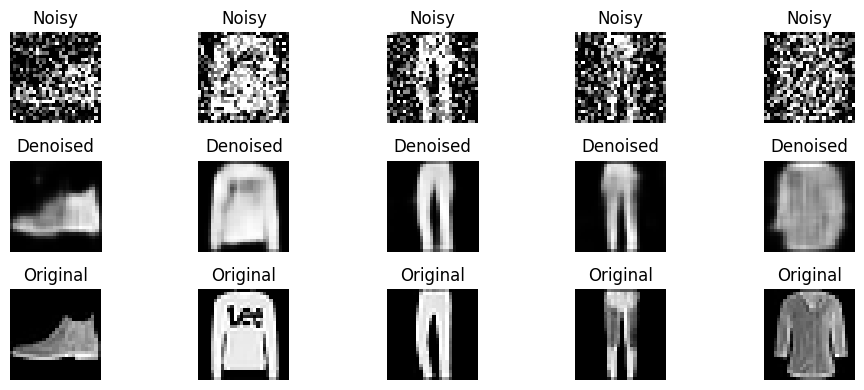

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Step 1 & 2: Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Step 3: Reshape for CNN
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Step 4: Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Step 5: Define the autoencoder
input_img = Input(shape=(28, 28, 1))
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 6 & 7: Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 8: Visualize results
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    # Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
    # Original image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()
